<a href="https://colab.research.google.com/github/pedro-schabarum/machine_learning/blob/main/Clustering_aplicado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Jornada musical

## Aula 1.4 Analise de dados

**Bases usadas**


*   Dados gerais de músicas
*   Dados relacionados à gêneros
*   Dados relacionados aos anos

In [1]:
import pandas as pd
import numpy as np

In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/sthemonica/music-clustering/main/Dados/Dados_totais.csv')
dados_generos = pd.read_csv('https://raw.githubusercontent.com/sthemonica/music-clustering/main/Dados/data_by_genres.csv')
dados_anos = pd.read_csv('https://raw.githubusercontent.com/sthemonica/music-clustering/main/Dados/data_by_year.csv')

In [3]:
dados.head(2)

valence  year  acousticness   artists  danceability  duration_ms  energy  \
0    0.285  2000       0.00239  Coldplay         0.429       266773   0.661   
1    0.613  2000       0.14300   OutKast         0.843       270507   0.806   

   explicit                      id  instrumentalness  key  liveness  \
0         0  3AJwUDP919kvQ9QcozQPxg          0.000121   11    0.2340   
1         1  0I3q5fE6wg7LIfHGngUTnV          0.000000    4    0.0771   

   loudness  mode         name  popularity  speechiness    tempo  \
0    -7.227     1       Yellow          84       0.0281  173.372   
1    -5.946     0  Ms. Jackson          80       0.2690   94.948   

            artists_song  
0      Coldplay - Yellow  
1  OutKast - Ms. Jackson

In [4]:
dados["year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [5]:
dados.shape

(20311, 19)

In [6]:
dados = dados.drop(["explicit", "key", "mode"], axis=1)

In [7]:
dados.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [8]:
dados.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [9]:
dados_generos.head(2)

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834    0.3616 -31.514333     0.040567   75.336500   
1  0.450678          0.477762    0.1310 -16.854000     0.076817  120.285667   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5

In [10]:
dados_generos = dados_generos.drop(columns=["mode", "key"])
dados_generos.head(2)

genres  acousticness  danceability   duration_ms    energy  \
0  21st century classical      0.979333      0.162883  1.602977e+05  0.071317   
1                   432hz      0.494780      0.299333  1.048887e+06  0.450678   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.606834    0.3616 -31.514333     0.040567   75.336500  0.103783   
1          0.477762    0.1310 -16.854000     0.076817  120.285667  0.221750   

   popularity  
0   27.833333  
1   52.500000

In [11]:
dados.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [12]:
dados_generos.isnull().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [13]:
dados_anos.head(2)

mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878   0.20571 -17.048667     0.073662  101.531493  0.379327   
1          0.434195   0.24072 -19.275282     0.116655  100.884521  0.535549   

   popularity  key  
0    0.653333    2  
1    0.140845   10

In [14]:
dados_anos = dados_anos.drop(columns=["mode", "key"])
dados_anos.head(2)

year  acousticness  danceability    duration_ms    energy  \
0  1921      0.886896      0.418597  260537.166667  0.231815   
1  1922      0.938592      0.482042  165469.746479  0.237815   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878   0.20571 -17.048667     0.073662  101.531493  0.379327   
1          0.434195   0.24072 -19.275282     0.116655  100.884521  0.535549   

   popularity  
0    0.653333  
1    0.140845

In [15]:
dados_anos["year"].unique()

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

In [16]:
dados_anos = dados_anos[dados_anos["year"]>=2000]
dados_anos["year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [17]:
dados_anos.reset_index()

index  year  acousticness  danceability    duration_ms    energy  \
0      79  2000      0.289323      0.590918  242724.642638  0.625413   
1      80  2001      0.286842      0.583318  240307.796010  0.626986   
2      81  2002      0.282624      0.576160  239503.283000  0.641270   
3      82  2003      0.256471      0.575763  244670.575230  0.660165   
4      83  2004      0.280559      0.567680  237378.708037  0.648868   
5      84  2005      0.255764      0.572281  237229.588205  0.653209   
6      85  2006      0.279986      0.568230  234042.914359  0.650326   
7      86  2007      0.254081      0.563414  241049.962564  0.668305   
8      87  2008      0.249192      0.579193  240107.315601  0.671461   
9      88  2009      0.261929      0.564190  238140.013265  0.670749   
10     89  2010      0.242687      0.572488  242811.804563  0.681778   
11     90  2011      0.273183      0.552867  236998.787308  0.648301   
12     91  2012      0.249953      0.570882  245807.457584  0.656571   
13     92  2013      0.257488      0.571148  242267.661437  0.645597   
14     93  2014      0.249313      0.589948  233728.314713  0.648795   
15     94  2015      0.253952      0.593774  230029.046606  0.627064   
16     95  2016      0.284171      0.600202  221396.510295  0.592855   
17     96  2017      0.286099      0.612217  211115.696787  0.590421   
18     97  2018      0.267633      0.663500  206001.007133  0.602435   
19     98  2019      0.278299      0.644814  201024.788096  0.593224   
20     99  2020      0.219931      0.692904  193728.397537  0.631232   

    instrumentalness  liveness  loudness  speechiness       tempo   valence  \
0           0.101168  0.197686 -8.247766     0.089205  118.999323  0.559475   
1           0.107214  0.187026 -8.305095     0.089182  117.765399  0.541479   
2           0.088048  0.193911 -7.686640     0.084308  119.239738  0.542397   
3           0.083049  0.196976 -7.485545     0.093926  120.914622  0.530504   
4           0.077934  0.202199 -7.601655     0.094239  121.290346  0.524489   
5           0.090194  0.190082 -7.466159     0.093334  121.617967  0.532531   
6           0.077701  0.188289 -7.265501     0.085847  121.798615  0.520028   
7           0.072957  0.196127 -7.044536     0.084347  124.087516  0.516794   
8           0.063662  0.198431 -6.843804     0.077356  123.509934  0.527542   
9           0.075872  0.205252 -7.046015     0.085458  123.463808  0.507170   
10          0.082981  0.199701 -6.909904     0.081031  123.570215  0.520895   
11          0.103772  0.203309 -7.574986     0.087479  121.483997  0.472454   
12          0.085206  0.189733 -7.260550     0.081742  121.781736  0.462709   
13          0.098365  0.199631 -7.472039     0.093849  120.806829  0.454741   
14          0.076570  0.191822 -7.067440     0.084061  122.305263  0.463049   
15          0.106787  0.188856 -7.625639     0.096779  120.115411  0.432098   
16          0.093984  0.181170 -8.061056     0.104313  118.652630  0.431532   
17          0.097091  0.191713 -8.312630     0.110536  117.202740  0.416476   
18          0.054217  0.176326 -7.168785     0.127176  121.922308  0.447921   
19          0.077640  0.172616 -7.722192     0.121043  120.235644  0.458818   
20          0.016376  0.178535 -6.595067     0.141384  124.283129  0.501048   

    popularity  
0    46.684049  
1    48.750125  
2    48.655500  
3    48.626407  
4    49.273143  
5    50.953333  
6    51.313846  
7    51.075897  
8    50.630179  
9    51.440816  
10   52.730159  
11   53.307387  
12   52.655013  
13   54.047065  
14   55.543142  
15   56.700608  
16   59.647190  
17   63.263554  
18   63.296243  
19   65.256542  
20   64.301970

In [18]:
dados_anos.isnull().sum()

year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [19]:
dados_anos.isna().sum()

year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

## Aula 1.5 Vizualiando os dados

In [20]:
# importando biblioteca
import plotly.express as px

In [21]:
fig = px.line(dados_anos, x="year", y="loudness", markers = True, title="Variação do 'loudness' com o passar dos anos")
fig.show()

In [22]:
import plotly.graph_objects as go

In [23]:
fig = go.Figure()

#adicionando traços
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['acousticness'], name='Acousticness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['valence'], name='Valence'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['danceability'], name='Danceability'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['energy'], name='Energy'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['instrumentalness'], name='Instrumentalness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['liveness'], name='Liveness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['speechiness'], name='Speechiness'))

fig.show()

In [24]:
fig = px.imshow(dados.corr(numeric_only=True), text_auto=True)
fig.show()

# Aula 2 - Clusterização por gênero

## Aula 2.1 PCA e StandardScaler

In [25]:
dados_generos

genres  acousticness  danceability   duration_ms  \
0     21st century classical      0.979333      0.162883  1.602977e+05   
1                      432hz      0.494780      0.299333  1.048887e+06   
2                      8-bit      0.762000      0.712000  1.151770e+05   
3                         []      0.651417      0.529093  2.328809e+05   
4                 a cappella      0.676557      0.538961  1.906285e+05   
...                      ...           ...           ...           ...   
2968                    zolo      0.222625      0.547082  2.580991e+05   
2969                 zouglou      0.161000      0.863000  2.063200e+05   
2970                    zouk      0.263261      0.748889  3.060728e+05   
2971            zurich indie      0.993000      0.705667  1.984173e+05   
2972                  zydeco      0.421038      0.629409  1.716717e+05   

        energy  instrumentalness  liveness   loudness  speechiness  \
0     0.071317          0.606834  0.361600 -31.514333     0.040567   
1     0.450678          0.477762  0.131000 -16.854000     0.076817   
2     0.818000          0.876000  0.126000  -9.180000     0.047000   
3     0.419146          0.205309  0.218696 -12.288965     0.107872   
4     0.316434          0.003003  0.172254 -12.479387     0.082851   
...        ...               ...       ...        ...          ...   
2968  0.610240          0.143872  0.204206 -11.295878     0.061088   
2969  0.909000          0.000000  0.108000  -5.985000     0.081300   
2970  0.622444          0.257227  0.089678 -10.289222     0.038778   
2971  0.172667          0.468633  0.179667 -11.453333     0.348667   
2972  0.609369          0.019248  0.255877  -9.854825     0.050491   

           tempo   valence  popularity  
0      75.336500  0.103783   27.833333  
1     120.285667  0.221750   52.500000  
2     133.444000  0.975000   48.000000  
3     112.857352  0.513604   20.859882  
4     112.110362  0.448249   45.820071  
...          ...       ...         ...  
2968  125.494919  0.596155   33.778943  
2969  119.038000  0.845000   58.000000  
2970  101.965222  0.824111   46.666667  
2971   91.278000  0.739000    0.000000  
2972  126.366087  0.808544   30.261905  

[2973 rows x 12 columns]

In [26]:
# verifica q a coluna tem valores únicos
dados_generos['genres'].value_counts().sum()

2973

In [27]:
dados_generos1 = dados_generos.drop(columns=['genres'])
dados_generos1

acousticness  danceability   duration_ms    energy  instrumentalness  \
0         0.979333      0.162883  1.602977e+05  0.071317          0.606834   
1         0.494780      0.299333  1.048887e+06  0.450678          0.477762   
2         0.762000      0.712000  1.151770e+05  0.818000          0.876000   
3         0.651417      0.529093  2.328809e+05  0.419146          0.205309   
4         0.676557      0.538961  1.906285e+05  0.316434          0.003003   
...            ...           ...           ...       ...               ...   
2968      0.222625      0.547082  2.580991e+05  0.610240          0.143872   
2969      0.161000      0.863000  2.063200e+05  0.909000          0.000000   
2970      0.263261      0.748889  3.060728e+05  0.622444          0.257227   
2971      0.993000      0.705667  1.984173e+05  0.172667          0.468633   
2972      0.421038      0.629409  1.716717e+05  0.609369          0.019248   

      liveness   loudness  speechiness       tempo   valence  popularity  
0     0.361600 -31.514333     0.040567   75.336500  0.103783   27.833333  
1     0.131000 -16.854000     0.076817  120.285667  0.221750   52.500000  
2     0.126000  -9.180000     0.047000  133.444000  0.975000   48.000000  
3     0.218696 -12.288965     0.107872  112.857352  0.513604   20.859882  
4     0.172254 -12.479387     0.082851  112.110362  0.448249   45.820071  
...        ...        ...          ...         ...       ...         ...  
2968  0.204206 -11.295878     0.061088  125.494919  0.596155   33.778943  
2969  0.108000  -5.985000     0.081300  119.038000  0.845000   58.000000  
2970  0.089678 -10.289222     0.038778  101.965222  0.824111   46.666667  
2971  0.179667 -11.453333     0.348667   91.278000  0.739000    0.000000  
2972  0.255877  -9.854825     0.050491  126.366087  0.808544   30.261905  

[2973 rows x 11 columns]

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [29]:
SEED = 1224
np.random.seed(SEED)

pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2, random_state=SEED))
])


In [30]:
genre_embedding_pca = pca_pipeline.fit_transform(dados_generos1)
projetion = pd.DataFrame(columns=['x', 'y'], data=genre_embedding_pca)
projetion

x         y
0     5.910268 -0.011146
1     2.787093  4.498483
2    -0.757538 -1.258495
3     1.020521 -0.931690
4     0.753911 -0.999861
...        ...       ...
2968 -0.475136 -0.017126
2969 -3.026756 -1.304983
2970 -0.832511 -1.089726
2971  1.774790 -3.695233
2972 -1.028069 -1.390709

[2973 rows x 2 columns]

## Aula 2.2 K-Means

In [31]:
from sklearn.cluster import KMeans

In [32]:
kmeans_pca = KMeans(n_clusters=5, verbose=True, random_state=SEED)

kmeans_pca.fit(projetion)

dados_generos['cluster_pca'] = kmeans_pca.predict(projetion)
projetion['cluster_pca'] = kmeans_pca.predict(projetion)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia 4523.567815543696.
Iteration 1, inertia 3668.9855521560244.
Iteration 2, inertia 3624.7309257118204.
Iteration 3, inertia 3602.4958137588187.
Iteration 4, inertia 3588.0607912404857.
Iteration 5, inertia 3575.439570259302.
Iteration 6, inertia 3566.3761311630205.
Iteration 7, inertia 3562.591728457493.
Iteration 8, inertia 3560.314467700935.
Iteration 9, inertia 3558.885495152649.
Iteration 10, inertia 3558.002748934052.
Iteration 11, inertia 3557.7295547754898.
Converged at iteration 11: center shift 9.319981044865494e-05 within tolerance 0.00027098868470996505.
Initialization complete
Iteration 0, inertia 3650.5166847646487.
Iteration 1, inertia 3552.891536564816.
Iteration 2, inertia 3528.942542123225.
Iteration 3, inertia 3518.849132048712.
Iteration 4, inertia 3512.6717916139805.
Iteration 5, inertia 3509.1741078247464.
Iteration 6, inertia 3506.3883335513747.
Iteration 7, inertia 3505.0910743094128.
Iteration 8, inertia 3504.6465117384

In [33]:
projetion

x         y  cluster_pca
0     5.910268 -0.011146            3
1     2.787093  4.498483            3
2    -0.757538 -1.258495            4
3     1.020521 -0.931690            1
4     0.753911 -0.999861            1
...        ...       ...          ...
2968 -0.475136 -0.017126            2
2969 -3.026756 -1.304983            4
2970 -0.832511 -1.089726            4
2971  1.774790 -3.695233            1
2972 -1.028069 -1.390709            4

[2973 rows x 3 columns]

In [34]:
projetion['generos'] = dados_generos['genres']
projetion

x         y  cluster_pca                 generos
0     5.910268 -0.011146            3  21st century classical
1     2.787093  4.498483            3                   432hz
2    -0.757538 -1.258495            4                   8-bit
3     1.020521 -0.931690            1                      []
4     0.753911 -0.999861            1              a cappella
...        ...       ...          ...                     ...
2968 -0.475136 -0.017126            2                    zolo
2969 -3.026756 -1.304983            4                 zouglou
2970 -0.832511 -1.089726            4                    zouk
2971  1.774790 -3.695233            1            zurich indie
2972 -1.028069 -1.390709            4                  zydeco

[2973 rows x 4 columns]

## 2.3 Plotando a cluestering

In [35]:
fig = px.scatter(projetion, x='x', y='y', color='cluster_pca', hover_data=['x','y','generos'])
fig.show()

In [36]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.49270669947266443

In [37]:
pca_pipeline[1].explained_variance_.sum()

5.421597305805701

# Aula 3 - Clusterização por música

## Aula 3.1 Redução de dimensionalidade com PCA

In [38]:
dados['artists'].value_counts()

artists
Drake                   170
Taylor Swift            156
Eminem                  147
Kanye West              136
BTS                     122
                       ... 
Of Monsters and Men       7
The Living Tombstone      7
Clean Bandit              7
Nelly Furtado             6
Empire of the Sun         6
Name: count, Length: 875, dtype: int64

In [39]:
dados['artists_song'].value_counts()

artists_song
Coldplay - Yellow                                                   1
Juice WRLD - Intro                                                  1
Carrie Underwood - The Champion - Bonus Track                       1
YoungBoy Never Broke Again - Cross Me (feat. Lil Baby and Plies)    1
Twenty One Pilots - Morph                                           1
                                                                   ..
Taylor Swift - Come Back...Be Here                                  1
Banda El Recodo - Me Gusta Todo De Ti                               1
Michael Bublé - The Christmas Song                                  1
Glee Cast - Smooth Criminal (Glee Cast Version) (feat. 2CELLOS)     1
Eminem - Darkness                                                   1
Name: count, Length: 20311, dtype: int64

In [40]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(dtype=int)
colunas_ohe = ohe.fit_transform(dados[['artists']]).toarray()
dados2 = dados.drop(columns=['artists'])

dados_musicas_dummies = pd.concat([dados2, pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names_out(['artists']))], axis=1)
dados_musicas_dummies

valence  year  acousticness  danceability  duration_ms  energy  \
0        0.285  2000       0.00239         0.429       266773   0.661   
1        0.613  2000       0.14300         0.843       270507   0.806   
2        0.400  2000       0.00958         0.556       216880   0.864   
3        0.543  2000       0.00664         0.545       233933   0.865   
4        0.760  2000       0.03020         0.949       284200   0.661   
...        ...   ...           ...           ...          ...     ...   
20306    0.187  2020       0.57400         0.445       176250   0.330   
20307    0.240  2020       0.81500         0.467       179188   0.429   
20308    0.466  2020       0.31000         0.562       253613   0.686   
20309    0.522  2020       0.20400         0.598       230600   0.472   
20310    0.195  2020       0.00998         0.671       337147   0.623   

                           id  instrumentalness  liveness  loudness  ...  \
0      3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227  ...   
1      0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  ...   
2      60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870  ...   
3      6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708  ...   
4      3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244  ...   
...                       ...               ...       ...       ...  ...   
20306  0PUkanqCGTb6qseXPKOw1F          0.000000    0.1020    -8.121  ...   
20307  6Iw6fQVKZi0fWtEQBrTFcP          0.000052    0.1770    -8.689  ...   
20308  308prODCCD0O660tIktbUi          0.022500    0.1250    -8.480  ...   
20309  2f8y4CuG57UJEmkG3ujd0D          0.000015    0.1080   -10.991  ...   
20310  5SiZJoLXp3WOl3J4C8IK0d          0.000008    0.6430    -7.161  ...   

      artists_Zara Larsson  artists_Zedd  artists_alt-J  artists_blackbear  \
0                        0             0              0                  0   
1                        0             0              0                  0   
2                        0             0              0                  0   
3                        0             0              0                  0   
4                        0             0              0                  0   
...                    ...           ...            ...                ...   
20306                    0             0              0                  0   
20307                    0             0              0                  0   
20308                    0             0              0                  0   
20309                    0             0              0                  0   
20310                    0             0              0                  0   

      artists_blink-182  artists_deadmau5  artists_for KING & COUNTRY  \
0                     0                 0                           0   
1                     0                 0                           0   
2                     0                 0                           0   
3                     0                 0                           0   
4                     0                 0                           0   
...                 ...               ...                         ...   
20306                 0                 0                           0   
20307                 0                 0                           0   
20308                 0                 0                           0   
20309                 0                 0                           0   
20310                 0                 0                           0   

       artists_fun.  artists_girl in red  artists_iann dior  
0                 0                    0                  0  
1                 0                    0                  0  
2                 0                    0                  0  
3                 0                    0                  0  
4                 0                    0                  0  
...             ...            

In [41]:
dados.shape

(20311, 16)

In [42]:
dados_musicas_dummies.shape

(20311, 890)

In [43]:

pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.7, random_state=SEED))
])

music_embedding_pca = pca_pipeline.fit_transform(dados_musicas_dummies.drop(['id', 'name','artists_song'], axis=1))
projection_music = pd.DataFrame(data=music_embedding_pca)

In [44]:
pca_pipeline[1].n_components_

612

Cluster

In [45]:
kmeans_pca_pipeline = KMeans(n_clusters=50, verbose=False, random_state=SEED)

kmeans_pca_pipeline.fit(projection_music)

dados['cluster_pca'] = kmeans_pca_pipeline.predict(projection_music)
projection_music['cluster_pca'] = kmeans_pca_pipeline.predict(projection_music)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [46]:
projection_music['artist'] = dados['artists']
projection_music['song'] = dados['artists_song']

In [47]:
projection_music

0         1         2         3         4         5         6  \
0      0.174796  0.731252  2.186797 -0.767192  0.594847  0.315968 -0.412322   
1     -1.358420  0.052935 -1.789973  1.938444  0.403606  1.023898 -1.172118   
2     -0.972077  0.658094  0.757500 -0.277350 -0.400393  0.402941  1.292960   
3     -0.926464  1.292091  0.398499 -0.997738  0.202219  0.620859 -0.527689   
4     -1.710077 -0.383502 -1.258562  1.346428  1.223591  1.744579  0.094311   
...         ...       ...       ...       ...       ...       ...       ...   
20306  1.346699 -2.775889  0.986755 -1.704967  0.103935 -0.726582  0.253808   
20307  1.269387 -2.444619  0.971408 -0.115303 -0.719597 -1.823579 -0.545186   
20308  0.781916 -1.164865  0.705256 -0.947160  1.145828 -0.472667 -0.356604   
20309  0.002454 -3.056407 -0.272934  1.436355 -0.604453  0.251492 -1.361710   
20310 -0.957008 -1.208016  1.103144  4.128170  1.026126  0.085505  1.588383   

              7         8         9  ...       605       606       607  \
0     -0.479171 -2.700668  2.109956  ... -0.009111  0.005154 -0.034027   
1      0.821698 -1.716897  0.252498  ... -0.031986  0.029708 -0.016322   
2      1.839192 -1.562236  1.410677  ...  0.017097  0.017361 -0.010979   
3      1.135529 -1.343893  1.020964  ...  0.089337  0.164777 -0.064148   
4      0.479412 -2.125376  0.389565  ... -0.011937 -0.004081 -0.017478   
...         ...       ...       ...  ...       ...       ...       ...   
20306  0.520234 -0.064513  0.204971  ... -0.235355 -0.054256  0.016922   
20307 -1.475719 -0.338390  0.272129  ... -0.183026  0.074605  0.005622   
20308  0.972512  0.900317 -0.674016  ... -0.033420 -0.157564  0.213849   
20309 -0.633245  0.280076  0.521145  ... -0.784640  0.080684  0.038379   
20310  0.567041 -1.026283  0.266124  ... -0.012069 -0.003818 -0.017675   

            608           609           610           611  cluster_pca  \
0     -0.032617  2.241192e-11  1.202033e-13  3.177821e-12            5   
1     -0.030234 -2.395758e-12  2.291641e-13 -1.187264e-12           12   
2     -0.012781  4.273933e-12 -6.407207e-13 -1.958694e-13           20   
3     -0.040911  5.152080e-11 -7.249490e-13  1.084807e-11           12   
4     -0.010033  2.254040e-12  1.683896e-13  8.389616e-13           12   
...         ...           ...           ...           ...          ...   
20306 -0.125947  4.217717e-11 -4.175589e-13  5.457610e-11           30   
20307  0.000054  4.323403e-11  1.154738e-11  9.481307e-12           30   
20308 -0.065180 -2.580928e-11  9.953739e-12  4.430351e-11           30   
20309  0.108493  5.473520e-11  1.333316e-11  1.185832e-11           30   
20310 -0.010372  2.372825e-12  1.582875e-13  8.373194e-13           30   

              artist                                song  
0           Coldplay                   Coldplay - Yellow  
1            OutKast               OutKast - Ms. Jackson  
2        Linkin Park            Linkin Park - In the End  
3       3 Doors Down           3 Doors Down - Kryptonite  
4             Eminem        Eminem - The Real Slim Shady  
...              ...                                 ...  
20306          Bazzi      Bazzi - I Don't Think I'm Okay  
20307  Bryson Tiller  Bryson Tiller - Timeless Interlude  
20308    Fleet Foxes              Fleet Foxes - Sunblind  
20309          Gunna      Gunna - NASTY GIRL / ON CAMERA  
20310         Eminem                   Eminem - Darkness  

[20311 rows x 615 columns]

In [48]:
fig = px.scatter(projection_music, x=0, y=1, color='cluster_pca', hover_data=[0,1,'song'])
fig.show()

In [49]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.7000008463187031

In [50]:
pca_pipeline[1].explained_variance_.sum()

620.9313218688688

# Aula 4 - Sistemas de recomendação

## Recomendando músicas

In [51]:
nome_musica = input('Digite o nome da música: ')

Digite o nome da música: Panic! At The Disco - House of Memories


In [52]:
from sklearn.metrics.pairwise import euclidean_distances

cluster = list(projection_music[projection_music['song']==nome_musica]['cluster_pca'])[0]
musicas_recomendadas= projection_music[projection_music['cluster_pca']==cluster][[0,1,'song']]
x_musica = list(projection_music[projection_music['song']== nome_musica][0])[0]
y_musica = list(projection_music[projection_music['song']== nome_musica][1])[0]

In [53]:
# distancias euclidianas

distancias = euclidean_distances(musicas_recomendadas[[0,1]], [[x_musica, y_musica]])
musicas_recomendadas['id'] = dados['id']
musicas_recomendadas['distancias'] = distancias
recomendadas = musicas_recomendadas.sort_values('distancias').head(10)
recomendadas

0         1                                              song  \
2347  -1.025889 -0.709794           Panic! At The Disco - House of Memories   
16871 -1.051416 -0.696047        Gorillaz - Ascension (feat. Vince Staples)   
11334 -1.040639 -0.740014  Beyoncé - Don't Hurt Yourself (feat. Jack White)   
4725  -1.062371 -0.696214                      One Direction - Ready to Run   
18202 -0.994955 -0.738934                             Prince Royce - Solita   
3838  -1.012974 -0.664453                  Wisin & Yandel - Sexy Movimiento   
1220  -0.988904 -0.744929                 Miley Cyrus - Party In The U.S.A.   
11649 -1.045725 -0.762132                              Jake Owen - Homemade   
13147 -0.971115 -0.721666                          Banda Machos - La suegra   
7276  -1.002987 -0.652052                 Luke Bryan - Most People Are Good   

                           id  distancias  
2347   2DgdHcjWmO3qd50RzuBLgZ    0.000000  
16871  2bBMODHVTXGwE2aZYfbgCt    0.028993  
11334  78eouBKVRyhbSzJwChr6QM    0.033627  
4725   7GtGeeChOx4NS77bqK8SUx    0.038928  
18202  7f7hBMVpdt2KGVOMHCGQnl    0.042497  
3838   1Kgyx7NLtzsa3gWV1efGHu    0.047144  
1220   5Q0Nhxo0l2bP3pNjpGJwV1    0.051013  
11649  31JID2STTlLuFqXFWHyM8e    0.055971  
13147  0YIyyTbaIM0MYrfOLhvlrI    0.056046  
7276   79LAFAkR1ATb4iIQvZuCL0    0.062119

## Biblioteca Spotipy

In [54]:
# !pip install spotipy

In [55]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth

In [56]:
scope = 'user-library-read playlist-modify-private'
OAuth = SpotifyOAuth(
    scope=scope,
    redirect_uri='http://localhost:8888/callback',
    client_id='7c6c000a04c84d479c58af9d72ef317c',
    client_secret='53a9aa10275144e89e72d69040ea7e2f')

client_credentials_manager = SpotifyClientCredentials(client_id = '7c6c000a04c84d479c58af9d72ef317c',client_secret = '53a9aa10275144e89e72d69040ea7e2f')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

## Imagem do álbum

Digite o nome da música: Panic! At The Disco - House of Memories


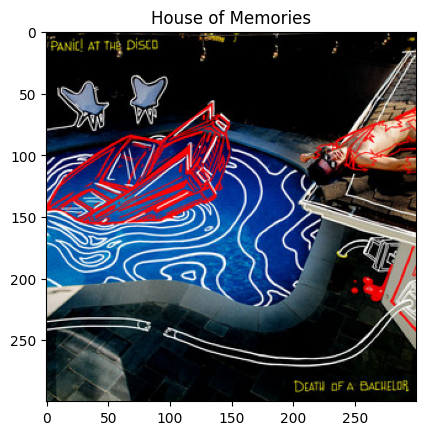

In [82]:
import matplotlib.pyplot as plt
from skimage import io

nome_musica = input('Digite o nome da música: ')
id = dados[dados['artists_song']==nome_musica]['id'].iloc[0]
track = sp.track(id)
url = track['album']['images'][1]['url']
name = track['name']
image = io.imread(url)
plt.imshow(image)
plt.title(name)
plt.show()

# Aula 5 - Recomendador

## Aula 5.1 - Buscando dados da playlist

In [59]:
def recommend_id(playlist_id):
  url = []
  nome = []

  for i in playlist_id:
    track = sp.track(i)
    url.append(track['album']['images'][1]['url'])
    nome.append(track['name'])
  return nome, url

In [60]:
name, url = recommend_id(recomendadas['id'])

## Aula 5.2 - Gerando as imagens

In [61]:
def visualize_songs(name,url):

  plt.figure(figsize=(15,10))
  columns = 5

  for i, u in enumerate(url):
    # define o ax como o subplot, com a divisão que retorna inteiro do número urls pelas colunas + 1 (no caso, 6)
    ax = plt.subplot(len(url) // columns + 1, columns, i + 1)

    # Lendo a imagem com o Scikit Image
    image = io.imread(u)

    # Mostra a imagem
    plt.imshow(image)

    # Para deixar o eixo Y invisível
    ax.get_yaxis().set_visible(False)

    # xticks define o local que vamos trocar os rótulos do eixo x, nesse caso, deixar os pontos de marcação brancos
    plt.xticks(color = 'w', fontsize = 0.1)

    # yticks define o local que vamos trocar os rótulos do eixo y, nesse caso, deixar os pontos de marcação brancos
    plt.yticks(color = 'w', fontsize = 0.1)

    # Colocando o nome da música no eixo x
    plt.xlabel(name[i], fontsize = 8)

    # Faz com que todos os parâmetros se encaixem no tamanho da imagem definido
    plt.tight_layout(h_pad=0.7, w_pad=0)

    # Ajusta os parâmetros de layout da imagem.
    # wspace = A largura do preenchimento entre subparcelas, como uma fração da largura média dos eixos.
    # hspace = A altura do preenchimento entre subparcelas, como uma fração da altura média dos eixos.
    plt.subplots_adjust(wspace=None, hspace=None)

    # Remove os ticks - marcadores, do eixo x, sem remover o eixo todo, deixando o nome da música.
    plt.tick_params(bottom = False)

    # Tirar a grade da imagem, gerada automaticamente pelo matplotlib
    plt.grid(visible=None)
  plt.show()

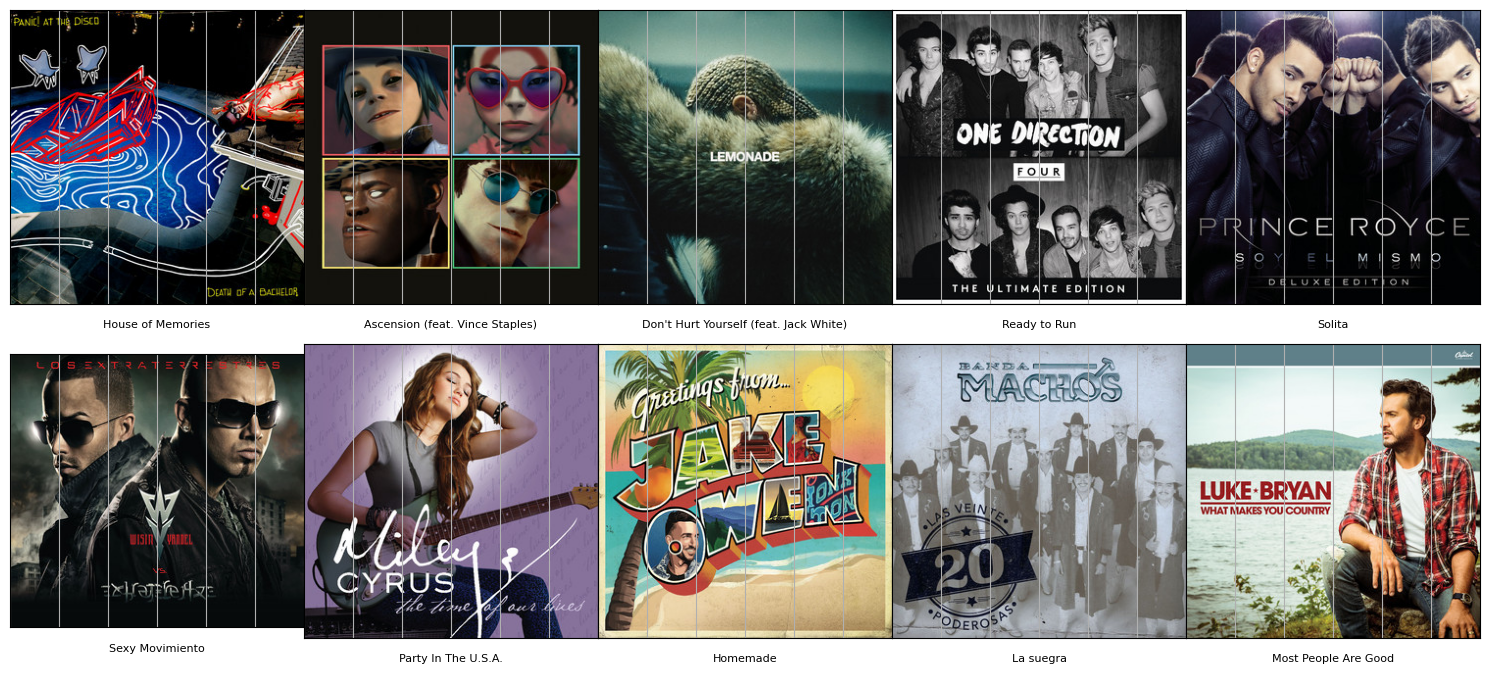

In [62]:
visualize_songs(name,url)

## Aula 5.3 - Função final

In [79]:
def recomendador(nome_musica):

## Calculando as distâncias
  cluster = list(projection_music[projection_music['song']== nome_musica]['cluster_pca'])[0]
  recomendadas = projection_music[projection_music['cluster_pca']== cluster][[0, 1, 'song']]
  x_musica = list(projection_music[projection_music['song']== nome_musica][0])[0]
  y_musica = list(projection_music[projection_music['song']== nome_musica][1])[0]
  distancias = euclidean_distances(recomendadas[[0, 1]], [[x_musica, y_musica]])
  recomendadas['id'] = dados['id']
  recomendadas['distancias'] = distancias
  recomendada = recomendadas.sort_values('distancias').head(10)

  # ## Acessando os dados de cada música com a biblioteca Spotipy (nome e imagem)
  playlist_id = recomendada['id']

  url = []
  name = []
  for i in playlist_id:
      track = sp.track(i)
      url.append(track["album"]["images"][1]["url"])
      name.append(track["name"])

# ## Plotando as figuras
  plt.figure(figsize=(15,10))
  columns = 5
  for i, u in enumerate(url):
      ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
      image = io.imread(u)
      plt.imshow(image)
      ax.get_yaxis().set_visible(False)
      plt.xticks(color = 'w', fontsize = 0.1)
      plt.yticks(color = 'w', fontsize = 0.1)
      plt.xlabel(name[i], fontsize = 10)
      plt.tight_layout(h_pad=0.7, w_pad=0)
      plt.subplots_adjust(wspace=None, hspace=None)
      plt.grid(visible=None)
      plt.tick_params(bottom = False)
  plt.show()

Digite o nome da música: Lady Gaga - Just Dance


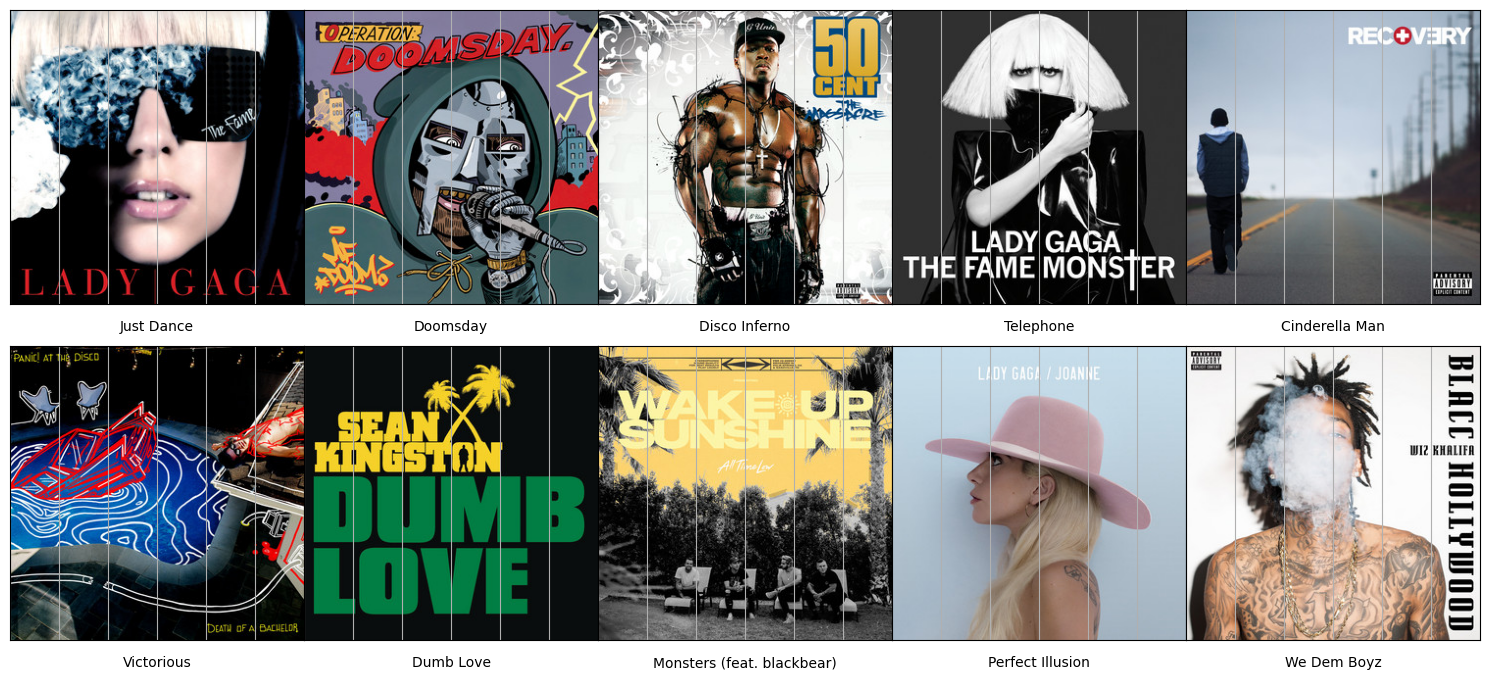

In [80]:
recomendador(input('Digite o nome da música: '))